In [1]:
!pip install geopy

In [0]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim

import folium

## Final consolidated data that from data.ipynb

In [4]:
stations_venues = pd.read_csv('stations_venues.csv', index_col=0)
stations_venues.head()

,Station name,location,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Airoli,"(19.158514699999998, 72.99940185331164)",0.0,5.0,0.0,13.0,2.0,7.0,15.0,4.0,3.0,3.0
1,Ambarnath,"(19.1436074, 73.2955345448486)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ambivli,"(19.267645, 73.1718625)",0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,4.0
3,Andheri,"(19.1196976, 72.8464205)",5.0,8.0,0.0,33.0,7.0,9.0,21.0,4.0,36.0,14.0
4,Asangaon,"(19.4409122, 73.3065183)",0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0


# Data analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# lets keep stations which have atleast 1 venue
stations_venues=stations_venues[stations_venues.sum(axis=1) >0].reset_index(drop=True)

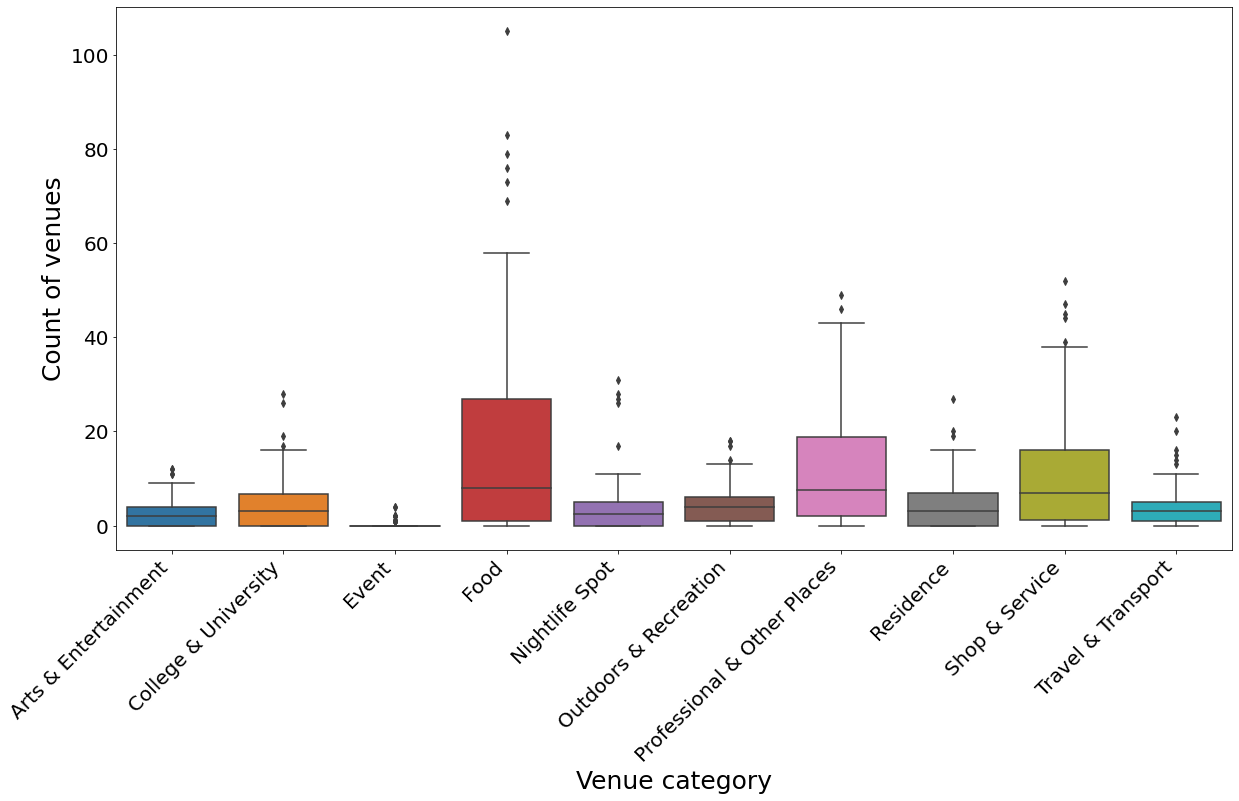

In [7]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = stations_venues)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()


The highest frequeny of venue categories are, food, professional, shop & service 
as Event has very little data, we can discard it from both the dataframe and the list of categories.

In [0]:
stations_venues.drop('Event', 1, inplace=True)

In [0]:
categories_list=stations_venues.columns[2:].tolist()

In [10]:
stations_venues.dtypes

Station name                    object
location                        object
Arts & Entertainment           float64
College & University           float64
Food                           float64
Nightlife Spot                 float64
Outdoors & Recreation          float64
Professional & Other Places    float64
Residence                      float64
Shop & Service                 float64
Travel & Transport             float64
dtype: object

In [0]:
from sklearn.preprocessing import MinMaxScaler

X = stations_venues.values[:,2:]
cluster_dataset = MinMaxScaler().fit_transform(X)

In [12]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c for c in categories_list]
cluster_df.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.000000,0.178571,0.123810,0.064516,0.388889,0.306122,0.148148,0.057692,0.130435
1,0.000000,0.000000,0.009524,0.000000,0.000000,0.040816,0.037037,0.057692,0.173913
2,0.416667,0.285714,0.314286,0.225806,0.500000,0.428571,0.148148,0.692308,0.608696
3,0.000000,0.000000,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478
4,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000


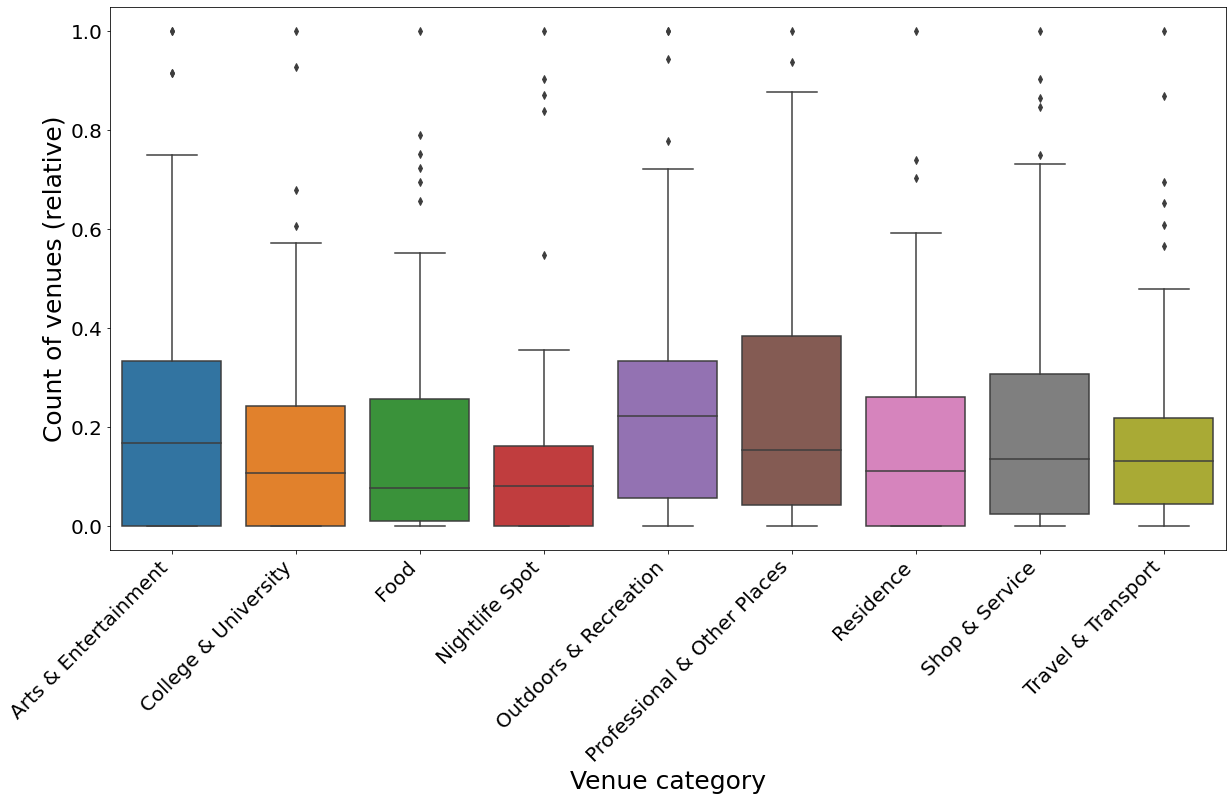

In [13]:

plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [0]:

from sklearn.cluster import KMeans
kclusters =4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)
    

stations_clusters_kmean = cluster_df.copy()
stations_clusters_kmean['Cluster'] = kmeans.labels_
stations_clusters_kmean['Station name'] = stations_venues['Station name']
stations_clusters_kmean['location'] = stations_venues['location']

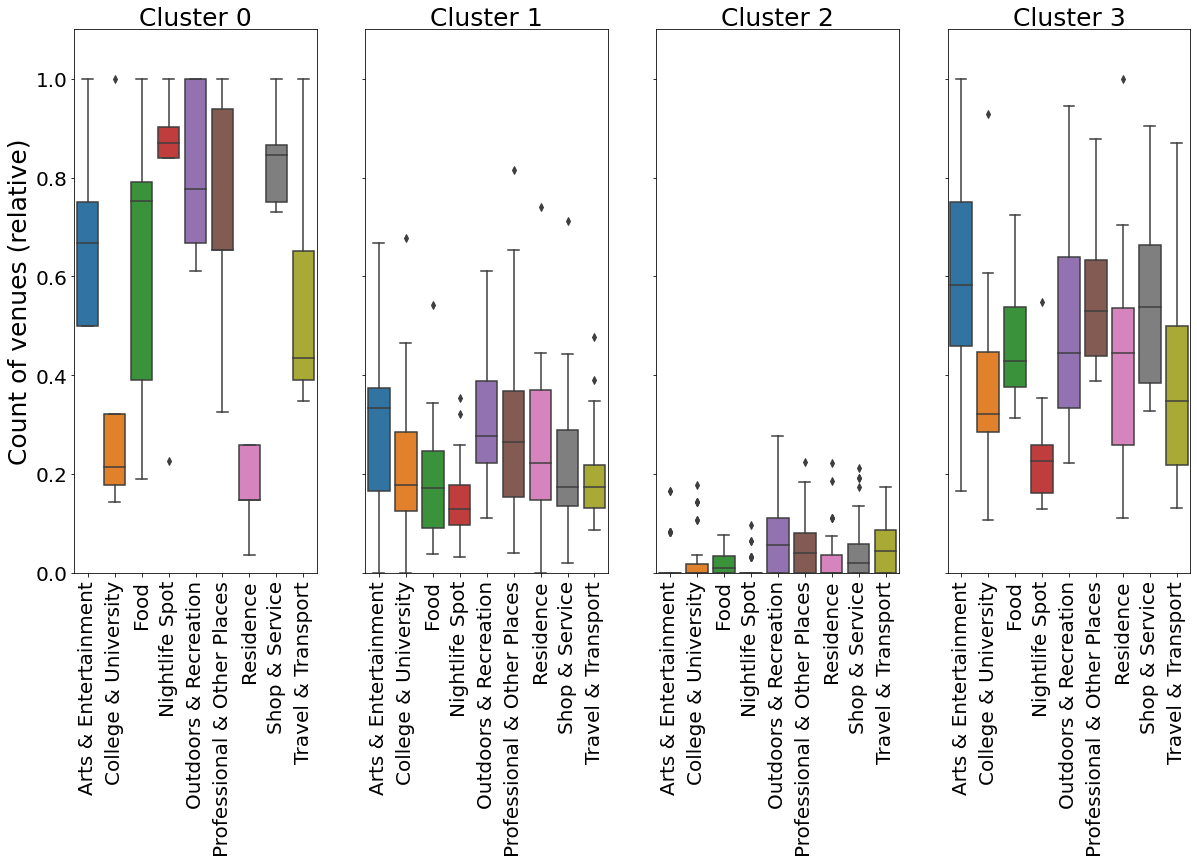

In [15]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_kmean[stations_clusters_kmean['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()


In [16]:
stations_clusters_kmean[stations_clusters_kmean.Cluster==3]

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station name,location
2,0.416667,0.285714,0.314286,0.225806,0.500000,0.428571,0.148148,0.692308,0.608696,3,Andheri,"(19.1196976, 72.8464205)"
6,0.500000,0.107143,0.523810,0.548387,0.333333,0.632653,0.222222,0.711538,0.434783,3,Bandra,"(19.05492845, 72.8405920869825)"
11,0.250000,0.321429,0.419048,0.161290,0.555556,0.387755,0.222222,0.653846,0.869565,3,Borivali,"(19.229068, 72.8573628)"
14,0.916667,0.321429,0.485714,0.193548,0.722222,0.428571,0.407407,0.346154,0.130435,3,Charni Road,"(18.9524563, 72.8174395)"
16,0.916667,0.571429,0.657143,0.322581,0.444444,0.632653,0.111111,0.673077,0.695652,3,Chhatrapati Shivaji Maharaj Terminus,"(18.9398453, 72.83547038112503)"
29,0.250000,0.285714,0.380952,0.129032,0.388889,0.877551,0.592593,0.365385,0.130435,3,Prabhadevi,"(19.0148811, 72.8279556)"
35,1.000000,0.321429,0.723810,0.258065,0.333333,0.530612,1.000000,0.403846,0.347826,3,Grant Road,"(18.96273275, 72.81603893825404)"
55,0.500000,0.357143,0.400000,0.193548,0.333333,0.510204,0.296296,0.365385,0.173913,3,King's Circle,"(19.0316822, 72.8577375)"
65,0.666667,0.464286,0.428571,0.129032,0.722222,0.489796,0.333333,0.519231,0.217391,3,Marine Lines,"(18.9456701, 72.823781)"
67,0.666667,0.607143,0.552381,0.225806,0.722222,0.551020,0.481481,0.596154,0.260870,3,Matunga,"(19.0274356, 72.8501467)"


In [0]:
mum_map = folium.Map(location=[19.281569, 72.921887], zoom_start=10)

In [0]:
for i in range(len(stations_clusters_kmean)):  
    colors=['blue','green','orange','red']
    popup='<b>'+stations_clusters_kmean['Station name'][i]+'</b>'
    folium.CircleMarker(
        eval(stations_clusters_kmean['location'][i]),
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=5,
        color=colors[stations_clusters_kmean['Cluster'][i]]
    ).add_to(mum_map)

In [27]:
mum_map

In [0]:
mum_map.save('map.html')